<a href="https://colab.research.google.com/github/Deborshipatra/workspace/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale # scale and center data

from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.decomposition import PCA # to perform PCA to plot the data

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


file mount

In [ ]:
import os
from google.colab import drive
drive.mount('/content/MyDrive/', force_remount=True)

Mounted at /content/MyDrive/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
d_df = pd.read_csv("./MyDrive/MyDrive/Heart_Disease_Prediction/heart_disease.csv")
# OR - pd.read_csv(data_path+"deliveries.csv"), where data_path = "../input/"
# reading deliveries dataset
''''score_df'''
m_df = pd.read_csv("MyDrive/MyDrive/Heart_Disease_Prediction/heart_disease.csv")
# OR - pd.read_csv(data_path+"matches.csv"), where data_path = "../input/"
# reading matches dataset
# csv- Comma seperated values
d_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Split the data into features and target

In [ ]:
m_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
d_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
m_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Load the heart disease dataset
data = pd.read_csv("./MyDrive/MyDrive/Heart_Disease_Prediction/heart_disease.csv")

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/50
7/7 [==============================] - 2s 46ms/step - loss: 0.6956 - accuracy: 0.5596 - val_loss: 0.6950 - val_accuracy: 0.4898
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6527 - accuracy: 0.6269 - val_loss: 0.6455 - val_accuracy: 0.6531
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6188 - accuracy: 0.7047 - val_loss: 0.6047 - val_accuracy: 0.7347
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.5851 - accuracy: 0.7150 - val_loss: 0.5743 - val_accuracy: 0.7551
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.5626 - accuracy: 0.7824 - val_loss: 0.5474 - val_accuracy: 0.7959
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5348 - accuracy: 0.7617 - val_loss: 0.5226 - val_accuracy: 0.8163
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5090 - accuracy: 0.8238 - val_loss: 0.4989 - val_accuracy: 0.8163
Epoch 8/50
7/7 [===========

In [ ]:
d_df['target'].count()

303

<Axes: xlabel='target', ylabel='count'>

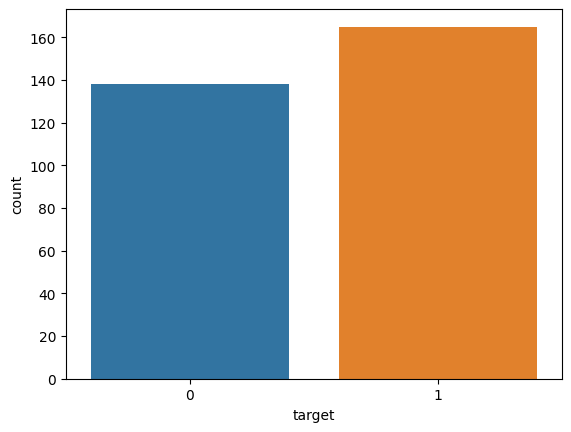

In [ ]:
sns.countplot(x='target',data=m_df)

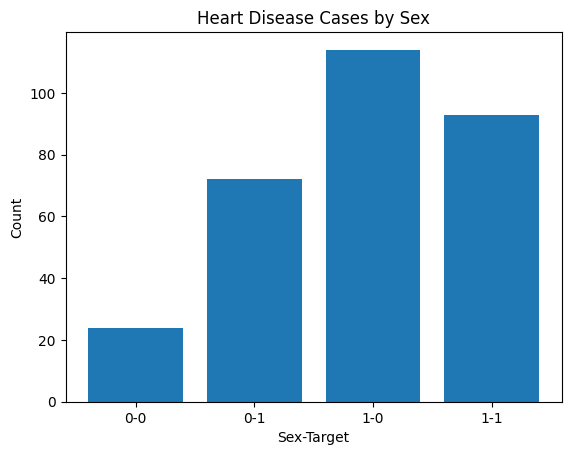

In [ ]:
import matplotlib.pyplot as plt

# Group the data by sex and target
grouped = data.groupby(['sex', 'target']).size().reset_index(name='count')

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(grouped['sex'].astype(str) + '-' + grouped['target'].astype(str), grouped['count'])
ax.set_xlabel('Sex-Target')
ax.set_ylabel('Count')
ax.set_title('Heart Disease Cases by Sex')
plt.show()


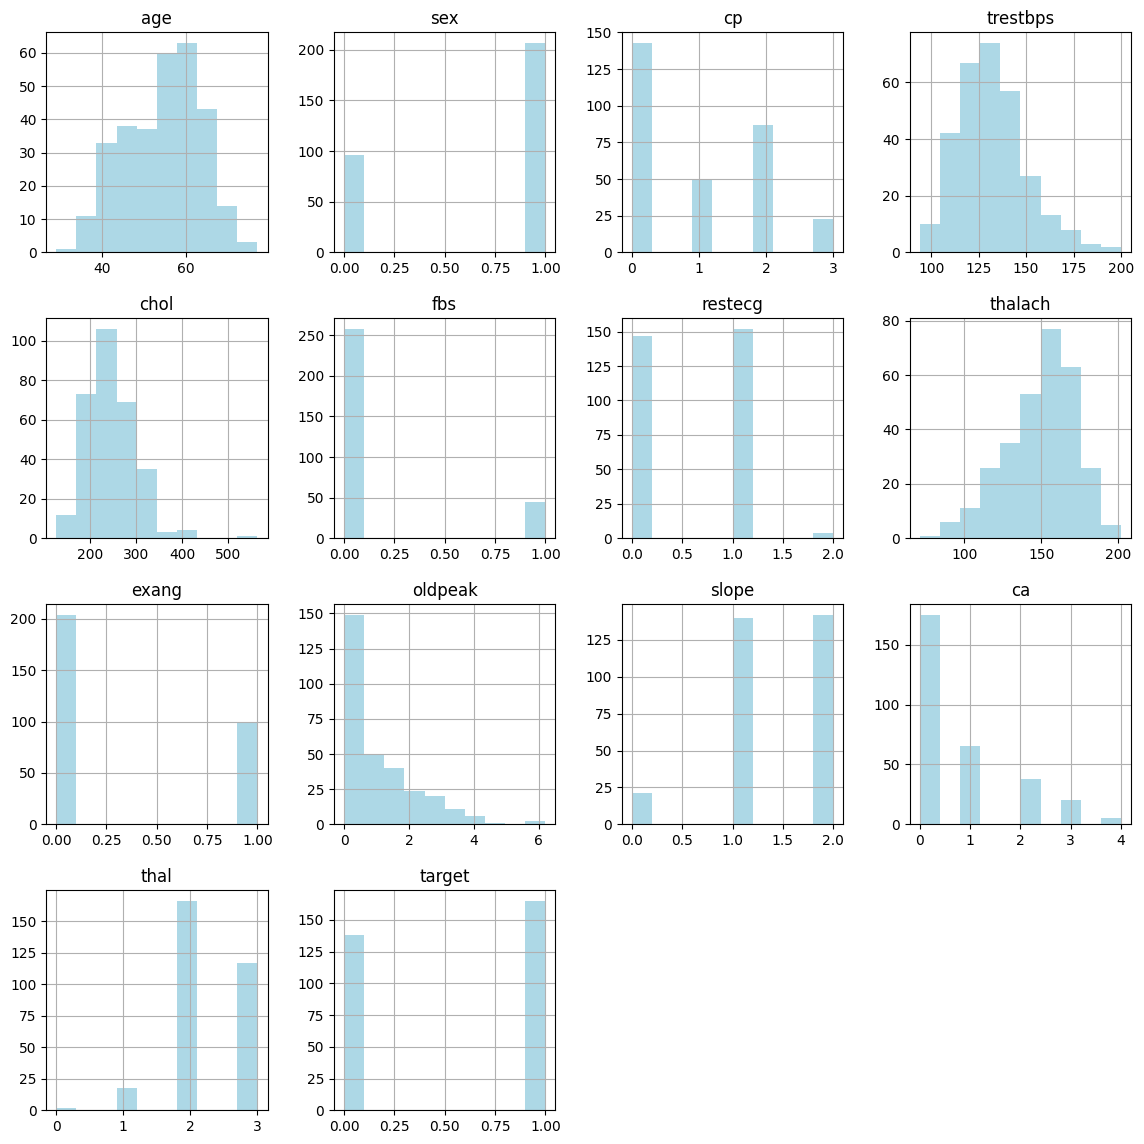

In [ ]:
m_df.hist(figsize=(14,14) , color = 'lightblue')
plt.show()